<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_HW_0513_Recommendation_System_MLGuide_591_624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 아이템 기반 최근접 이웃 혐업 필터링 실습
- 최근접 이웃 협업 필터링은 사용자 기반과 아이템 기반으로 분류된다.
- 협업 필터링 기반 : 사용자가 영화평점을 매긴 사용자-영화 평점 행렬 데이터셋이 필요.

### 데이터 가공 및 변환

In [1]:
import pandas as pd
import numpy as np
movies = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


- movies 파일은 영화에 대한 메타 정보인 title과 genre를 가지고 있는 영화정보이다.
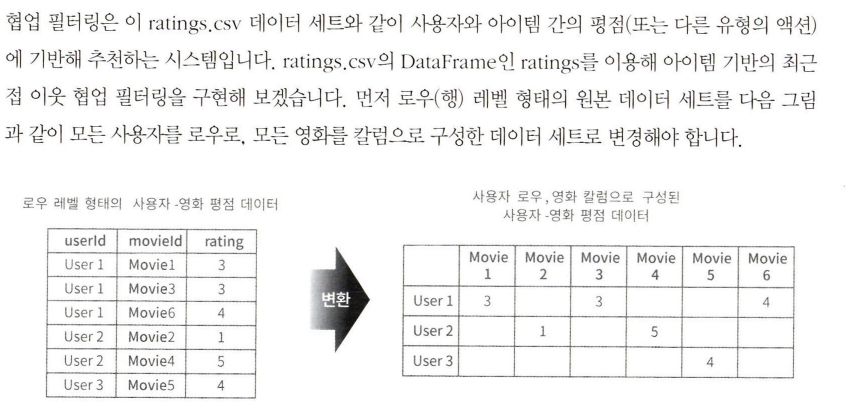

- 이같은 변환은 DataFrame의 pivot_table()함수를 이용하면 쉽게 할 수 있다.
- pivot_tabel()함수 : 로우레벨의 값을 칼럼으로 변경하는 데 효과적이다. columns = 'movieid' 인자를 통해 movieid칼럼의 모든 값이 새로운 칼럼 이름으로 변환된다.  


In [3]:
ratings = ratings[['userId','movieId','rating']]
ratings_matrix = ratings.pivot_table('rating', index = 'userId', columns = 'movieId')
ratings_matrix.head(3)

# 로우(행)레벨은 userId, 칼럼은 모두 movieId칼럼에 있는 값으로 칼럼 이름이 바뀌고,
# 데이터는 rating칼럼에 있는 값이 할당된다

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- pivot_table()을 적용한 후에 movieId값이 모두 칼럼명으로 변환되었다.
- NaN값이 많은 이유는 사용자가 평점을 매기지 않은 영화가 변환되며 NaN값이 할당되기 때문이다.
- 칼럼명이 1,2,3,...으로 할당되어 있어 영화명을 알기 어렵다. 가독성을 높이기 위해 join을 이용하여 칼럼명을 movieId가 아닌 영화면 title 로 변경하자. (영화명은 ratings에 존재하지 않고 movies 데이터셋에 존재한다.)
- 최소 평점이 0.5이므로 NaN은 모두 0으로 변환한다.
-

In [6]:
# title칼럼을 얻기 위해 movies와 조인
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns = 'title'로 title 칼럼으로 피벗 수행
ratings_matrix = rating_movies.pivot_table('rating', index = 'userId', columns = 'title')

# NaN 값을 모두 0으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 영화 간 유사도 산출
- 이제 변환된 사용자-영화 평점 행렬 데이터셋을 이용해 영화 간의 유사도를 측정한다. 영화 간 유사도는 코사인 유사도를 기반으로 하고 사이킷런의 cosine_simiariry()를 이용해 측정한다.
- 지금 만든 ratings_matrix 데이터 세트에 cosine_similarity()를 적용하면 영화 간 유사도를 측정할 수 없다. =>[ 이유 ] cosine_similarity()는 행을 기준으로 서로 다른 행을 비교해 유사도를 산출한다. ratinggs_matrix는 userId가 기준인 행 레벨의 데이터이므로 여기에 cosine_similarity()를 적용하면 영화 간의 유사도가 아닌 사용자 간의 유사도가 만들어진다.  => [ 해결책 ] transpose로 전치행렬을 만들어 행과 열의 위치를 뒤바꾸면 된다.

In [7]:
# 전치행렬 만들기
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 코사인 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_simiarity()로 반환된 넘파이 행렬을 영화명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data = item_sim, index = ratings_matrix.columns,
                           columns = ratings_matrix.columns)
print(item_sim_df.shape)

(9719, 9719)


In [9]:
item_sim_df.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [12]:
# 영화 '대부'와 유사도가 높은 상위 6개 영화 추출
item_sim_df["Godfather, The (1972)"].sort_values(ascending = False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [14]:
# 영화 '인셉션'와 유사도가 높은 상위 6개 영화 추출 (자기 자신은 유사도에서 제외)
item_sim_df["Inception (2010)"].sort_values(ascending = False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

### 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

- 앞 예제에서 만든 아이템 기반 영화 유사도 데이터는 모든 사용자의 평점을 기준으로 영화유사도 생성. but 개인적인 취향 반영X, only 영화간의 유사도만 가지고 추천
- 이제, 영화 유사도 데이터를 이용해 최근접 이윳 협업 필터링으로 개인에게 최적화된 영화 추천을 구현해보자.
- 개인화된 영화 추천 : 개인이 아직 관람하지 않은 영화를 추천. 아직 관람하지 않은 영화에 대해 아이템 유사도와 기존에 관람한 영화의 평점 데이터를 기반으로 해 새롭게 모든 영화의 예측 평점을 계산한 후 높은 예측 평점을 가진 영화를 추천

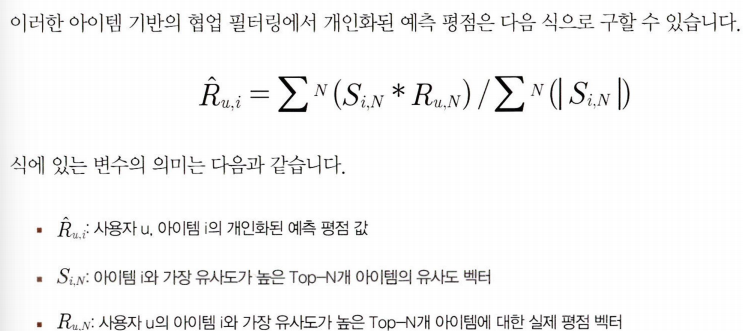

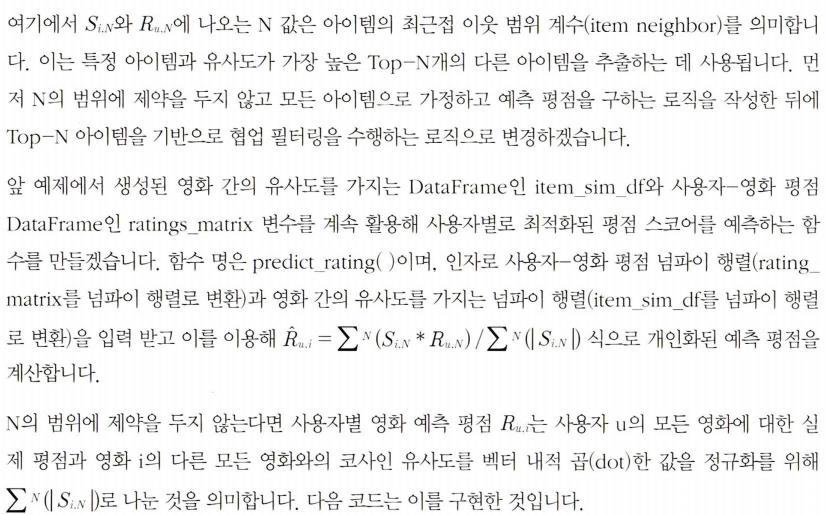

In [19]:
def predict_rating(ratings_arr, item_sim_arr):
  ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis = 1)])
  return ratings_pred

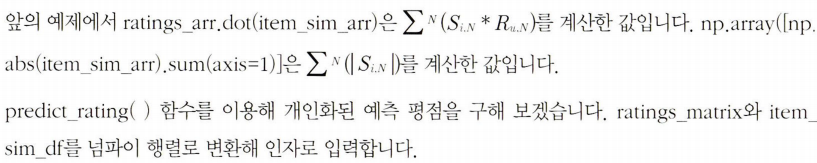

In [21]:
# 개인화된 예측 평점 구하기
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data = ratings_pred, index = ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


- 예측 평점이 사용자별 영화의 실제 평점과 영화의 코사인 유사도를 내적한 값이기 때문에 기존에 영화를 관람하지 않아 0에 해당했던 실제 영화 평점이 예측에서는 값이 부여되는 경우가 많이 발생한다. 예측 평점이 실제 평점에 비해 작을 수 있다. 이는 내적 결과를 코사인 유사도 벡터 합으로 나누었기 때문에 생기는 현상이다.
- 예측 평가 지표는 MSE를 적용힌다.

In [26]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE를 구함
def get_mse(pred, actual):
  # 평점이 있는 실제 영화만 추출
  pred = pred[actual.nonzero()].flatten()
  actual = actual[actual.nonzero()].flatten()
  return mean_squared_error(pred, actual)

print('아이템 기반 모든 최근접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 MSE:  9.895354759094706


- 앞의 predict_rating()함수는 사용자별 영화의 예측 평점을 계산하기 위해 해당 영화와 다른 모든 영화 간의 유사도를 적용한 것이다. -> 많은 영화의 유사도벡터를 이용해 상대적으로 평점 예측이 떨어짐
- 아래 정의하는 함수는 특정 영화와 가장 비슷한 유사도를 가지는 영화에 대해서만 유사도 벡터를 적용.

In [27]:
'''
Top-n 유사도를 가지는 영화유사도 벡터만 예측값을 계산
데이터가 커지면 예측시간 길어짐
'''

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
  # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
  pred = np.zeros(ratings_arr.shape)

  # 사용자-아이템 평점 행렬의 열 크기만큼 루프 수행
  for col in range(ratings_arr.shape[1]):
    # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 인덱스 반환
    top_n_items = [np.argsort(item_sim_arr[:,col])[:-n-1:-1]]
    # 개인화된 예측 평점을 계산
    for row in range(ratings_arr.shape[0]):
      pred[row,col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row,:][top_n_items].T)
      pred[row,col]/= np.sum(np.abs(item_sim_arr[col,:][top_n_items]))
  return pred

In [28]:
# 예측 평점 계산 & 실제 평점과의 MSE 구하기
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print('아이템 기반 최근접 TOP-20 이웃 MSE : ', get_mse(ratings_pred, ratings_matrix.values))

# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)

# MSE 작아짐 = 성능 향상
# MSE가 3.69로 기존의 9.89보다 많이 향상됨

<ipython-input-27-06dbba700206>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[row,col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row,:][top_n_items].T)


아이템 기반 최근접 TOP-20 이웃 MSE :  3.6949827608772314


In [29]:
# 특정 사용자에 대한 영화 추천하기
# userId = 9인 사용자에게 영화추천
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

# 사용자가 평점을 준 영화를 평점이 높은 순으로 나열

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

- 사용자가 이미 평점 준 영화 제외하고 추천할 수 있도록, 평점을 주지 않은 영화를 리스트객체로 반환하는 함수 get_useen_movies()


In [30]:
# 평점을 주지 않은 영화를 리스트객체로 반환하는 함수

def get_unseen_movie(ratings_matrix, userId):
  # userid로 입력받은 사용자의 모든 영화 정보 추출해 series로 반환함
  # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임
  user_rating = ratings_matrix.loc[userId, :]

  # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출해 list 객체로 만들음
  already_seen = user_rating[user_rating > 0].index.tolist()

  # 모든 영화명을 list 객체로 만들음
  movies_list = ratings_matrix.columns.tolist()

  # list comprehension으로 already_seen에 해당하는 영화는 movies_list에서 제외함
  unseen_list = [movie for movie in movies_list if movie not in already_seen]

  return unseen_list

- 예측평점 DataFrame과 추천하려는 사용자 Id, 추천 후보 영화 리스트, 추천 상위 영화 개수를 인자로 받아 사용자가 좋아할만한 가장 높은 예측 평점을 가진 영화를 추천

In [31]:
'''
사용자가 영화의 평점을 주지 않은 추천대상영화 정보와
predict_rating_topsim()에서 추출한 사용자별 아이템 유사도에 기반한 예측평점 데이터셋을 이용해
최종적으로 사용자에게 영화 추천하는 함수
'''

def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
  # 예측 평점 DataFrame에서 사용자 id 인덱스와 unseen_list로 들어온 영화명 칼럼을 추출해
  # 가장 예측 평점이 높은 순으로 정렬함
  recomm_movie = pred_df.loc[userId, unseen_list].sort_values(ascending = False)[:top_n]
  return recomm_movie

# 사용자가 관람하지 않는 영화명 추출
unseen_list = get_unseen_movie(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n = 10)

# 평점 데이터를 dataframe으로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])
recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


### 행렬 분해를 이용한 잠재요인 협업 필터링 실습

- 행렬분해잠재요인 협업 필터링은 SVD나 NMF 등을 적용할 수 있다. 일반적으로 행렬 분해에는 SVD가 자주 사용되지만 사용자-아이템 평점 행렬에는 사용자가 평점을 매기지 않은 Null데이터가 많기 때문에 주로 SGD나 ALS기반의 행렬 분해를 이용한다.여기서는 SGD기반의 행렬 분해를 구현하고 이를 기반으로 사용자에게 영화를 추천한다.



In [32]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda=0.01):
  num_users, num_items = R.shape
  # P와 Q 매트릭스의 크기를 지정하고 정규 분포를 가진 랜덤한 값으로 입력합니다.
  np.random.seed(1)
  P = np.random.normal(scale=1./K, size=(num_users, K))
  Q = np.random.normal(scale=1./K, size=(num_items, K))

  prev_rmse = 10000
  break_count = 0

  # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장
  non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

  # SGD기반으로 P와 Q 매트릭스를 계속 업데이트.
  for step in range(steps):
    for i, j, r in non_zeros:
      # 실제 값과 예측 값의 차이인 오류 값 구함
      eij = r - np.dot(P[i, :], Q[j, :].T)
      # Regularization을 반영한 SGD 업데이트 공식 적용
      P[i, :] += learning_rate * (eij * Q[j, :] - r_lambda * P[i, :])
      Q[j, :] += learning_rate * (eij * P[i, :] - r_lambda * Q[j, :])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 10) == 0 :
      print("### iteration step : ", step, " rmse : ", rmse)

  return  P,Q

###########
def get_rmse(R, P, Q, non_zeros):
  error = 0
  full_pred_matrix = np.dot(P, Q.T)

  x_non_zeros = [non_zero[0] for non_zero in non_zeros]
  y_non_zeros = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = [non_zero[2] for non_zero in non_zeros]

  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zeros, y_non_zeros]
  R_non_zeros = np.array(R_non_zeros)

  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse
###########

- 영화 평점 행렬 데이터를 새롭게 DataFrame으로 로딩한 뒤에 다시 사용자-아이템 평점 행렬로 만든다

In [34]:
import pandas as pd
import numpy as np

movies = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
# title 칼럼을 얻기 위해 moview와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')
# columns ='title'로 title 칼럼으로 pivot 수행
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

In [35]:
P,Q = matrix_factorization(ratings_matrix.values, K=50, steps=200,
                           learning_rate=0.01, r_lambda=0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.2960818299181014
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.2068545530233154
### iteration step :  80  rmse :  0.19413418783028685
### iteration step :  90  rmse :  0.18470082002720406
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.16695181946871726
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679646
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.15453398186715425
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180  rm

In [38]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [39]:
# 사용자가 관람하지 않은 영화명 추출
unseen_list = get_unseen_movie(ratings_matrix, 9)

# 잠재 요인 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이터를 dataframe으로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index,
                             columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


# 8. 파이썬 추천 시스템 패키지 - Surprise

In [37]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162987 sha256=735c999d888bf4e152ea6c3b096bc5416776fa3b1141bcd5f4a7637fd61a4f46
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


### surprise를 이용한 추천 시스템 구축

In [84]:
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split

- Surprise는 row레벨 형태로 되어있는 데이터만 처리한다.
- Surprise는 MovieLens사이트에서 제공하는 과거 버전의 데이터셋을 가져오는 API를 제공한다.

In [85]:
data = Dataset.load_builtin('ml-100k')
# 수행시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

- 데이터를 아카이브 데이터셋인 'ml-100k' 데이터를 아카이브 사이트로부터 내려받아 로컬 디렉터리에 저장한 뒤 데이터를 로딩한다.

In [86]:
algo = SVD()
algo.fit(trainset)

학습된 추천 알고리즘 기반 테스트 데이터 셋에 대한 추천을 수행한다. Surprise에서 추천을 예측하는 메서드는 test()와 predict()이다. predict()는 개별 사용자와 영화에 대한 추천 평점을 반환해준다. 예제를 통해 차이를 확인해보자.

In [87]:
# 학습된 추천 알고리즘 기반 테스트 데이터 셋에 대한 추천 수행
# 테스트 데이터셋 전체에 대해 추천 영화 평점 데이터를 생성한 후 최초 5개만 추출
predictions = algo.test(testset)
print('prediction type : ', type(predictions), ' size : ', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type :  <class 'list'>  size :  25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.455470526733538, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.889330685895166, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.096948671349619, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.513751209215977, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.480523108234619, details={'was_impossible': False})]

In [44]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.691991813467798),
 ('882', '291', 3.705707305506705),
 ('535', '507', 4.054191985450693)]

In [45]:
# predict() 이용해 개별 사용자의 아이템에 대한 추천 평점 예측
# 인자로 개별 사용자 아이디, 아이템 아이디 입력 시 추천 예측 평점을 포함한 정보 반환

# 사용자 아이디, 아이템 아이디는 문자열로 입력해야함
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.14   {'was_impossible': False}


In [77]:
accuracy.rmse(predictions)

RMSE: 0.9456


### Surprise 주요 모듈 소개

In [108]:
import pandas as pd

ratings=pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/ratings.csv')
#ratings_noh.csv 파일로 업로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/ratings_noh.csv', index=False, header=False)

- 헤더가 삭제된 ratings_noh.csv파일을 새롭게 생성. Reader클래스는 로딩될 ratings_noh.csv파일의 파싱 정보를 알려주기 위해 사용된다.
- ratings_noh.csv 는 칼럼 헤더X, 4개의 칼럼이 콤마로만 분리되어 있다. 이 4개의 칼럼이 사용자아이디, 아이템아이디, 평점, 타임스탬프임을 로딩할 때 알려줘야 한다.
- 다음 예제에서는 Reader객체 생성 시에 line_format인자로 user, item, rating, timestamp의 4개 칼럼으로 데이터가 구성되어 있음을 명시함. 각 칼럼의 분리 문자는 콤마, 평점의 단위는 0.5, 최대 평점은 5점으로 설정. 이렇게 Reader설정이 완료되면 Dataset.load_from_file()은 이를 기반으로 데이터를 파싱하면서 Dataset을 로딩한다. 로딩 시 ratings_noh.csv파일에서 앞의 3개 칼럼만 로딩되고 timestamp칼럼은 제외된다.

- 이제 svd행렬분해 기법을 이용해 추천예측을 한다. 잠재 요인 크기 K값을 나타내는 파라미터인 n_factors를 50으로 설정해 데이터를 학습한 뒤에 테스트 데이터셋을 적용해 예측 평점을 구하자. 그리고 RMSE로 평가한다.

In [61]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

#### Pandas DataFrame에서 Surprise로 데이터 세트로 로딩
- Dataset.load_from_df()를 이용하면 판다스의 DF에서도 Surprise 데이터 세트로 로딩가능.
- 주의점 : DF역시 사용자아이디,아이템아이디,평점칼럼 순서를 지켜야 한다. ratings.csv파일을 DF로 로딩한 ratings에서 Surprise 데이터셋으로 로딩하려면  Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)와 같이 파라미터를 입력하면 된다. 다음은 이를 이용한 SVD 추천 예측을 코드로 작성한 것이다

In [63]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### Surprise 추천 알고리즘
- SVD : 행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD알고리즘
- KNNBase : 최근접 이웃 협업 필터링을 위한 KNN알고리즘
- BaselineOnly : 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘
---
- Surprised SVD의 비용함수는 사용자 베이스라인 편향성을 감안한 평점 예측에 Regularization을 적용한 것이다.

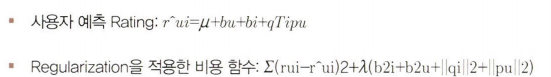

- SVD 클래스의 입력 파라미터는 다음과 같다
> - n_factors : 잠재요인 K의 개수, 디폴트 100. 커질수록 정확도 증가. but과적합 문제 발생가능
> - n_epochs : SGD(Stochastic Gradient Descent) 수행 시 반복 횟수. 디폴트 20
> - biased(bool) : 베이스라인 사용자 편향 적용 여부이며, 디폴트는 True이다.

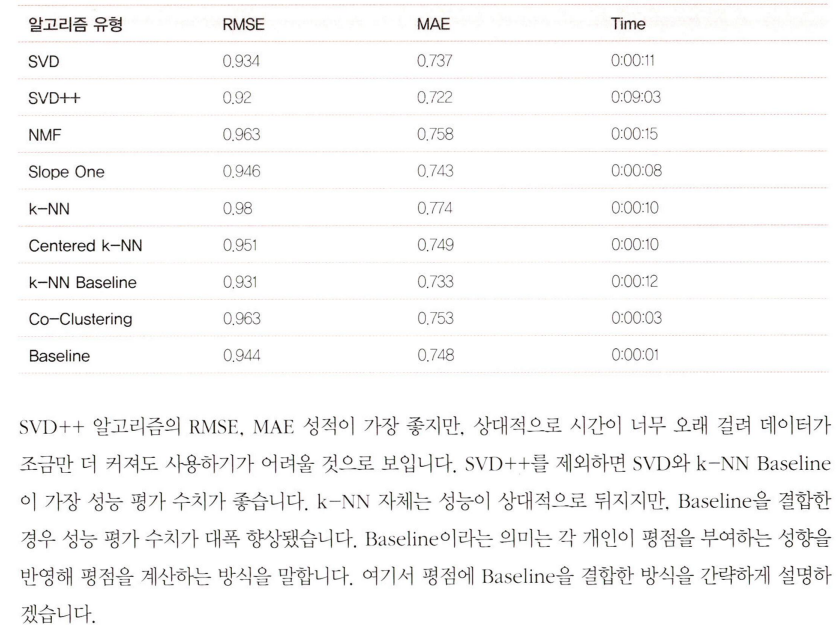

### 베이스라인 평점
- 베이스라인 평점(Baseline Rating) : 개인의 성향을 반영해 아이템 평가에 편향성 요소를 반영하여 평점을 부과하는 것
-  (베이스라인 평점) = (전체평균평점) + (사용자 편향점수) + (아이템편향점수)

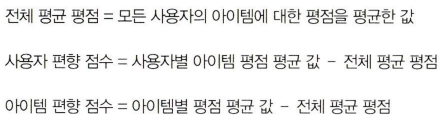

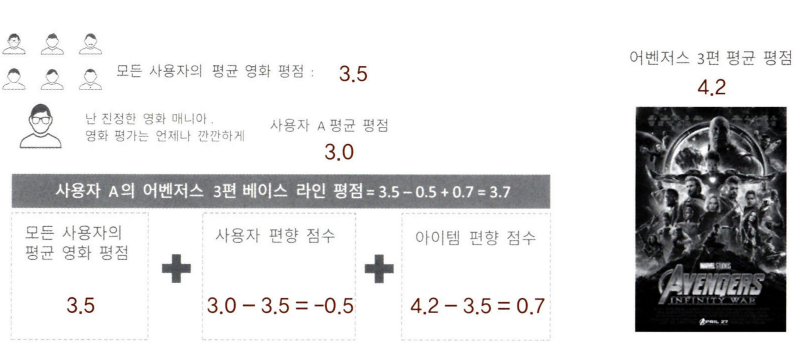

### 교차 검증과 하이퍼파라미터 튜닝
- Surprise는 교차 검증과 하이퍼파라미터 튜닝을 위해 사이킷런과 유사한 cross_validate()와 GridSearchCV클래스를 제공한다.
- 다음 예제에서는 cross_validate()를 이용해 5개의 학습/검증 폴드 데이터셋으로 분리해 교차 검증을 수행한 후 RMSE MAE로 성능 평가를 진행한다.

In [104]:
from surprise.model_selection import cross_validate

# 판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale = (0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# 교차검증세트의 분할 방식이 수행시마다 달라지므로 출력 결과는 조금씩 다를 수 있다.

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8727  0.8791  0.8719  0.8620  0.8794  0.8730  0.0063  
MAE (testset)     0.6732  0.6754  0.6703  0.6617  0.6743  0.6710  0.0050  
Fit time          1.67    1.63    1.72    1.63    1.64    1.66    0.04    
Test time         0.14    0.40    0.14    0.12    0.42    0.24    0.14    


{'test_rmse': array([0.87274913, 0.87911892, 0.87189798, 0.86198108, 0.87939244]),
 'test_mae': array([0.67318515, 0.67544324, 0.67027813, 0.66169803, 0.67432675]),
 'fit_time': (1.6668903827667236,
  1.6335299015045166,
  1.7248411178588867,
  1.6345937252044678,
  1.635267734527588),
 'test_time': (0.13563179969787598,
  0.3951890468597412,
  0.1445767879486084,
  0.11577630043029785,
  0.42354488372802734)}

In [105]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터를 딕셔너리 형태로 지정
# n_epoch는 점진적 하강방식의 반복횟수 지정
# n_factors는 SVD의 잠재요인 Kdml 크기를 지정.
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50,100,200]}

# CV를 3개 폴드 세트로 지정, 성능 평가는 RMSE, MSE로 수행하도록 GridsearchCV로 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8760916975396528
{'n_epochs': 20, 'n_factors': 50}


### Surprise를 이용한 개인화 영화 추천 시스템 구축
- **이번 예제에서는 학습데이터와 테스트 데이터로 분리하지 않고 전체를 학습 데이터로 사용한다.**
- 따라서 데이터셋을 그대로 fit()에 적용한 다음 코드는 오류를 일으킨다

In [ ]:
# # 다음 코드는 train_test_split()으로 분리되지 않는 데이터셋에 fit()을 호출해 오류가 발생합니다
# data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# algo = SVD(n_factors=50, random_state=0)
# algo.fit(data)

- 데이터셋 전체를 학습 데이터로 사용하려면 DatasetAutoFolds클래스를 이용한다.
- DatasetAutoFolds객체를 생성한 뒤에 build_full_trainset()메서드를 호출하면 전체 데이터를 학습 데이터셋으로 만들 수 있다.

In [109]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))

# DatasetAutoFolds 클래스를 ratins_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file='/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성한다
trainset = data_folds.build_full_trainset()

In [110]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [111]:
#특정 사용자 : userid=9

#영화에 대한 상세 속성 정보 dataframe 로딩
movies = pd.read_csv('/content/drive/MyDrive/ESAA_OB_HW/DATA/ml-latest-small/movies.csv')

#userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [112]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)
# 추천 예측 평점 est 값으로 3.13이다 => 사용자가 평점 안매긴 영화의 추천 예측 평점

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [113]:
# 사용자가 평점 매기지 않은 전체 영화 추출후 예측 평점 순으로 영화 추천

def get_unseen_surprise(ratings, movies, userId):
    # 입력값으로 들어온 userid에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

    # 모든 영화의 movieid를 리스트로 생성
    total_movies = movies['movieId'].tolist()

    # 모든 영화의 movieid 중 이미 평점을 매긴 영화의 movieid를 제외한 후 리스트로 생성
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))

    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [114]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict()메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

    # prediction list 객체는 surprise의 Predictions객체를 원소로 가지고 있음
    # [Prediction(uid='9,iid='1', est=3.69), Prediction(uid='9,iid='2', est=2.98)]

    # 이를 est값으로 정렬하기 위해서 아래의 sorkey_est함수를 정의함.
    #sortkey_est함수는 list객체의 sort()함수의 키값으로 사용되어 정렬 수행
    def sortkey_est(pred):
        return pred.est

    # sortkey_est() 반환값의 내림차순으로 정렬 수행하고 top_n개의 최상위 값 추출
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions = predictions[:top_n]

    # top_n으로 추출된 영화의 정보추출. 영화 이이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_rating = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

    top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('#### top 10 추천 영화 리스트 ####')
for top_movie in top_movie_preds:
    print(top_movie[1], ':', top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
#### top 10 추천 영화 리스트 ####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122657
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
